In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display



## Part A: Plot m_eq, n_eq, h_eq and t_m, t_n, t_eq

In [45]:
def m_eq(V):
    return .1*(25-V)/(np.exp((25-V)/10)-1) / ( .1*(25-V)/(np.exp((25-V)/10)-1) + 4*np.exp(-V/18))

def n_eq(V):
    return .01*((10-V)/(np.exp((10-V)/10) - 1) ) / ( .01*((10-V)/(np.exp((10-V)/10) -1))  + .125*np.exp(-V/80) )

def h_eq(V):
    return .07*np.exp(-V/20)/(.07*np.exp(-V/20) + 1/(np.exp((30-V)/10) + 1) )

def t_m(V):
    return 1/(.1*(25-V)/(np.exp((25-V)/10)-1) + 4*np.exp(-V/18)  )

def t_n(V):
    return 1/( .01*(10-V)/(np.exp((10-V)/10) -1 ) + .125*np.exp(-V/80))

def t_h(V):
    return 1/(.07*np.exp(-V/20) + 1/(np.exp((30-V)/10)+1)  )


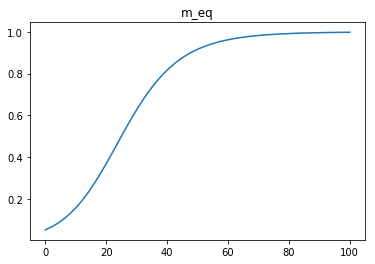

In [46]:
V = np.linspace(0,100)
plt.plot(V,m_eq(V))
plt.title("m_eq")

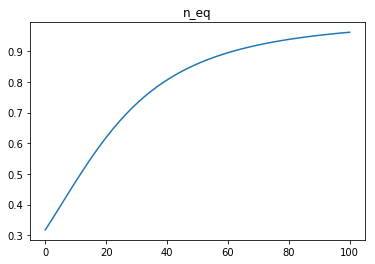

In [47]:
plt.plot(V,n_eq(V))
plt.title("n_eq")

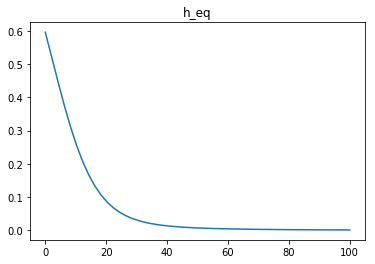

In [48]:
plt.plot(V,h_eq(V))
plt.title("h_eq")

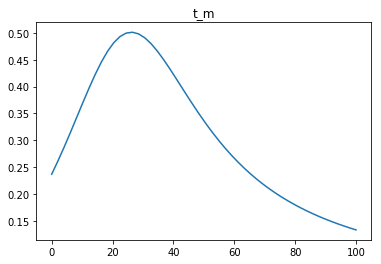

In [49]:
plt.plot(V,t_m(V))
plt.title("t_m")

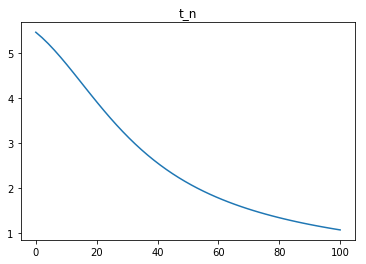

In [50]:
plt.plot(V,t_n(V))
plt.title("t_n")

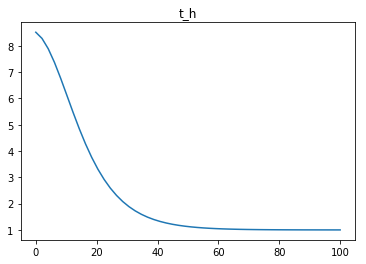

In [51]:
plt.plot(V,t_h(V))
plt.title("t_h")

## Part B

In [52]:
#dm/dt = -1/t_m (m - m_eq)
# gL = .3
# gNa = 120
# gK = 36
# VL = 10.613 * 10**-3
# VNa = 115 * 10**-3
# VK = -12 * 10**-3
# C = .001 * 10**-3 #converted 1 uF to mF

gL = .3
gNa = 120
gK = 36
VL = 10.613
VNa = 115 
VK = -12 
C = 1 #converted 1 uF to mF

def HH(f,t):
    V,n,m,h = f
    dV = 1/C* ( -1*gL*(V - VL) - gNa*m**3*h*(V-VNa) - gK*n**4*(V-VK) + I )
    dn = -1/t_n(V) * (n - n_eq(V))
    dm = -1/t_m(V) * (m - m_eq(V))
    dh = -1/t_h(V) * (h - h_eq(V))
    return [dV, dn, dm, dh]



## I = 0mA

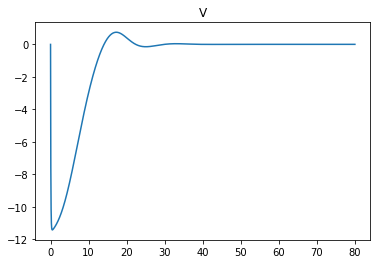

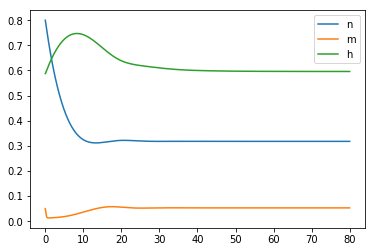

In [81]:
I = 0

t = np.linspace(0,80,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [0 ,.8,.05,.588],t)
#sol = odeint(HH, [0,.3,.05,.588],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()

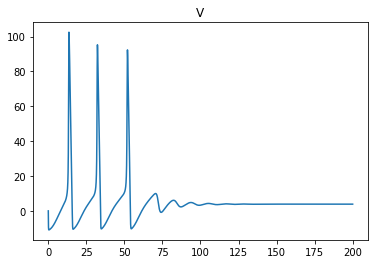

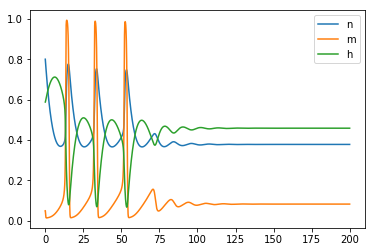

In [80]:
I = 6.2

t = np.linspace(0,200,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [0 ,.8,.05,.588],t)
#sol = odeint(HH, [0,.3,.05,.588],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()

## Periodic pulses for I > 6.3 mA

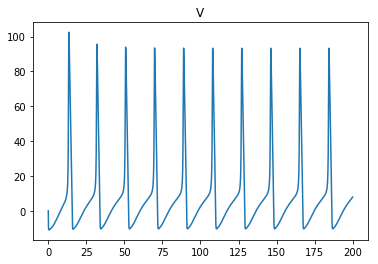

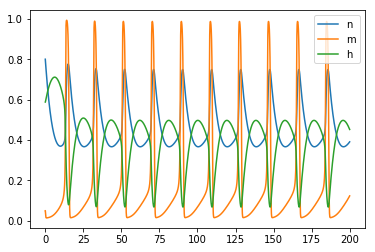

In [78]:
I = 6.3

t = np.linspace(0,200,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [0 ,.8,.05,.588],t)
#sol = odeint(HH, [0,.3,.05,.588],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()

## So the cutoff is about 6.25 mA, which gives about 1 pulse every 20 ms (50 Hz).  At I=10mA, it rises to 65 Hz, and at I=100mA, it gives about 150 Hz.  This suggests that the frequency scales roughly logarythimically with the current.

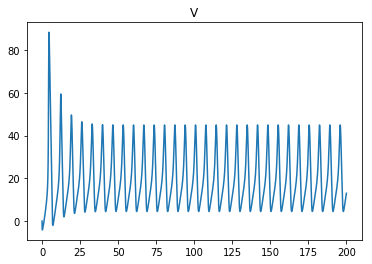

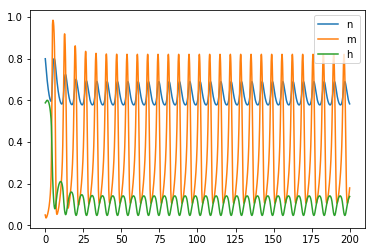

In [85]:
I = 100

t = np.linspace(0,200,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [0 ,.8,.05,.588],t)
#sol = odeint(HH, [0,.3,.05,.588],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()

## Part C

In [115]:
I=6
w = .5
def HHf(f,t):
    V,n,m,h = f
    dV = 1/C* ( -1*gL*(V - VL) - gNa*m**3*h*(V-VNa) - gK*n**4*(V-VK) + I + np.sin(w*t) )
    dn = -1/t_n(V) * (n - n_eq(V))
    dm = -1/t_m(V) * (m - m_eq(V))
    dh = -1/t_h(V) * (h - h_eq(V))
    return [dV, dn, dm, dh]

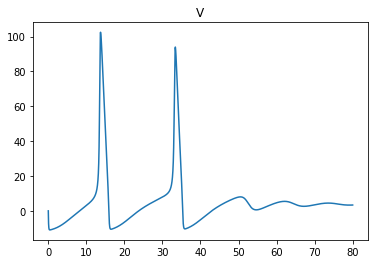

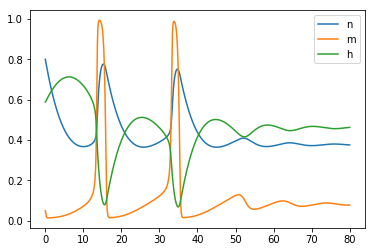

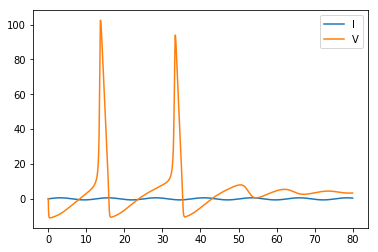

In [116]:
t = np.linspace(0,80,num=10**6) # in milliseconds, supposedly
from scipy.integrate import odeint
sol = odeint(HH, [0 ,.8,.05,.588],t)
#sol = odeint(HH, [0,.3,.05,.588],t)
x=plt.plot(t,sol[:,0])
plt.title("V")
plt.show()
plt.plot(t,sol[:,1],label="n")
plt.plot(t,sol[:,2],label="m")
plt.plot(t,sol[:,3],label="h")
plt.legend(loc='upper right')
plt.show()
plt.plot(t,I/10*np.sin(w*t),label="I")
plt.plot(t,sol[:,0],label="V")
#plt.plot(t,I/10*np.sin(w*t)*1/sol[:,0],label="V/I")
plt.legend(loc='upper right')
plt.show()

## Plot V, I, Z=V/I